# WEEK 3 : Machine Learning Foundations
# Project 5 : Predicting House Prices 
## Commands to install necessary libraries
## !pip install pandas numpy matplotlib seaborn scikit-learn
## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os

# Ensure the file path is correct

In [2]:
file_path = 'Housing.csv' 
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load the dataset

In [3]:
data = pd.read_csv(file_path)

# Exploratory Data Analysis

In [4]:
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Overview:
      Price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 t

# Check for missing values

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# convert categorical columns to numeric for correlation and modeling

In [6]:
data_encoded =pd.get_dummies(data, drop_first=True)

# Data Visualization

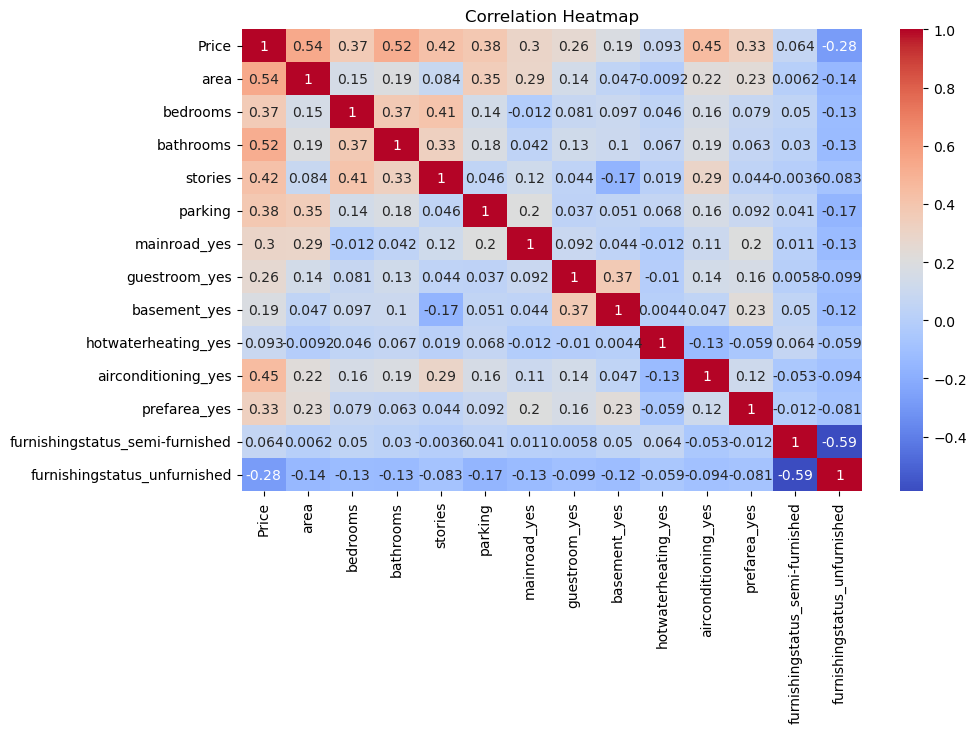

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for numeric columns

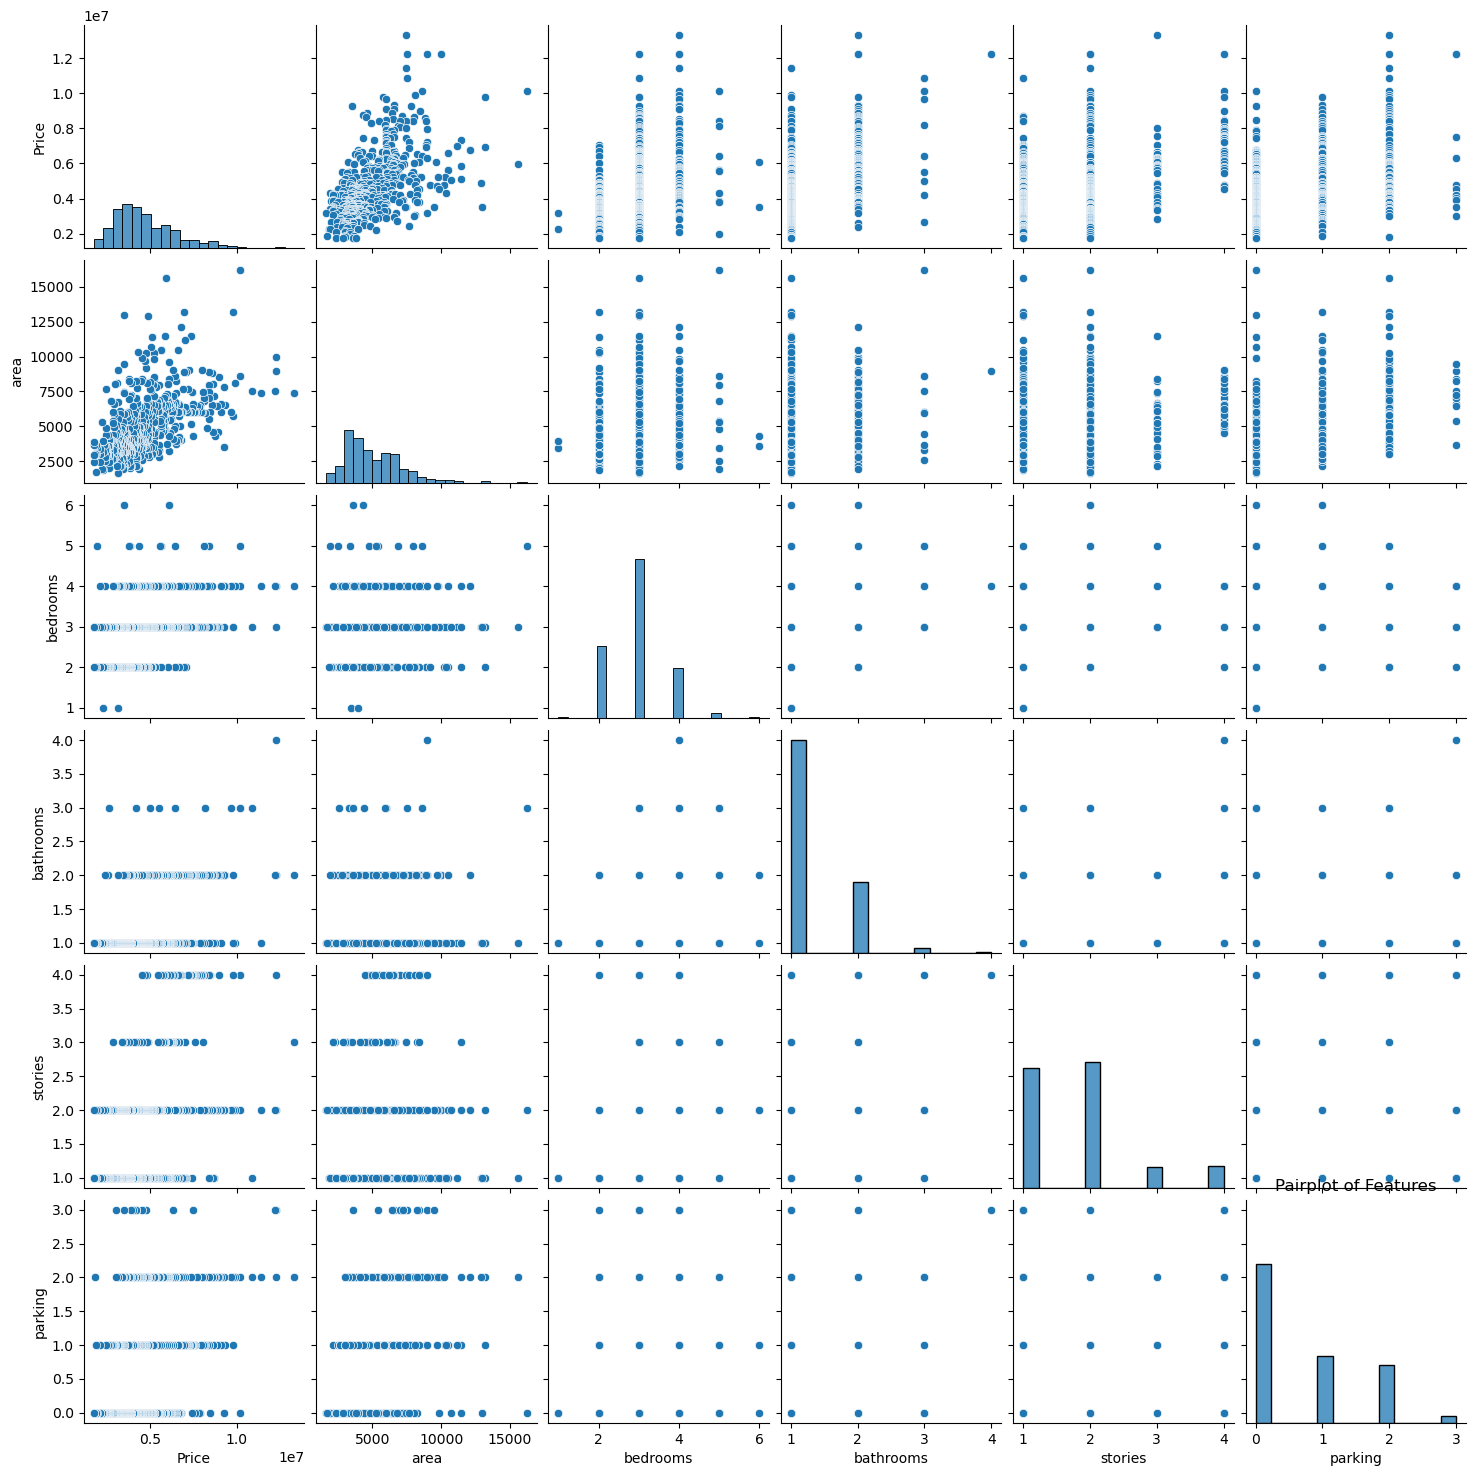

In [8]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) > 1:
    sns.pairplot(data[numeric_columns])
    plt.title('Pairplot of Features')
    plt.show()
else:
    print("Not enough numeric columns for pairplot.")

# Feature Selection

In [9]:
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

# Split the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature Scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training: Linaer Regression

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

# Model Training: Random Forest Regressor

In [14]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predictions

In [15]:
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation

In [16]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Results

In [17]:
print("\nLinear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R²): {r2_linear}")

print("\nRandom Forest Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R²): {r2_rf}")


Linear Regression Model Performance:
Mean Absolute Error (MAE): 970043.4039201644
Mean Squared Error (MSE): 1754318687330.669
R-squared (R²): 0.6529242642153175

Random Forest Regressor Model Performance:
Mean Absolute Error (MAE): 1021546.0353211008
Mean Squared Error (MSE): 1961585044320.3433
R-squared (R²): 0.611918531405699


# Optional: Hyperparameter Tuning for Random Forest

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)


Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


# Final Model with Best Parameters

In [19]:
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)

# Final Model Evaluation

In [20]:
best_rf_r2 = r2_score(y_test, best_rf_predictions)
print("\nBest Random Forest Model R² Score:")
print(best_rf_r2)


Best Random Forest Model R² Score:
0.6003865799717936
